   #     Predicting Traffic Accident Severity

## Data Preprocessing

In [75]:
import numpy as np
import pandas as pd
from sklearn.utils import resample
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
%matplotlib inline

In [2]:
df = pd.read_csv("Data-Collisions.csv")
df.head()

C:\Users\Bharath\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO',
       'STATUS', 'ADDRTYPE', 'INTKEY', 'LOCATION', 'EXCEPTRSNCODE',
       'EXCEPTRSNDESC', 'SEVERITYCODE.1', 'SEVERITYDESC', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'INCDATE',
       'INCDTTM', 'JUNCTIONTYPE', 'SDOT_COLCODE', 'SDOT_COLDESC',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SDOTCOLNUM', 'SPEEDING', 'ST_COLCODE', 'ST_COLDESC',
       'SEGLANEKEY', 'CROSSWALKKEY', 'HITPARKEDCAR'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

#### Removing all irrelevant features such as ID's and descriptions

In [5]:
df = df.drop(['OBJECTID','INCKEY','COLDETKEY','LOCATION','REPORTNO','STATUS','INTKEY','EXCEPTRSNCODE',
              'EXCEPTRSNDESC','SEVERITYDESC','INCDATE','SDOT_COLCODE','SDOT_COLDESC','SDOTCOLNUM','ST_COLCODE',
              'ST_COLDESC','SEGLANEKEY','CROSSWALKKEY','INCDTTM'],axis=1)

In [6]:
df.columns

Index(['SEVERITYCODE', 'X', 'Y', 'ADDRTYPE', 'SEVERITYCODE.1', 'COLLISIONTYPE',
       'PERSONCOUNT', 'PEDCOUNT', 'PEDCYLCOUNT', 'VEHCOUNT', 'JUNCTIONTYPE',
       'INATTENTIONIND', 'UNDERINFL', 'WEATHER', 'ROADCOND', 'LIGHTCOND',
       'PEDROWNOTGRNT', 'SPEEDING', 'HITPARKEDCAR'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 19 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
ADDRTYPE          192747 non-null object
SEVERITYCODE.1    194673 non-null int64
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
JUNCTIONTYPE      188344 non-null object
INATTENTIONIND    29805 non-null object
UNDERINFL         189789 non-null object
WEATHER           189592 non-null object
ROADCOND          189661 non-null object
LIGHTCOND         189503 non-null object
PEDROWNOTGRNT     4667 non-null object
SPEEDING          9333 non-null object
HITPARKEDCAR      194673 non-null object
dtypes: float64(2), int64(6), object(11)
memory usage: 28.2+ MB


In [8]:
df.isnull().columns.values.tolist()

['SEVERITYCODE',
 'X',
 'Y',
 'ADDRTYPE',
 'SEVERITYCODE.1',
 'COLLISIONTYPE',
 'PERSONCOUNT',
 'PEDCOUNT',
 'PEDCYLCOUNT',
 'VEHCOUNT',
 'JUNCTIONTYPE',
 'INATTENTIONIND',
 'UNDERINFL',
 'WEATHER',
 'ROADCOND',
 'LIGHTCOND',
 'PEDROWNOTGRNT',
 'SPEEDING',
 'HITPARKEDCAR']

#### Defining a function to find out missing values

In [9]:
def missing_function(df):
    missing_data = df.isnull()
    missing_data.head()

    for column in missing_data.columns.values.tolist():
        print(column)
        print(missing_data[column].value_counts())
        print(df[column].value_counts())
        print("")
        
missing_function(df)

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64
1    136485
2     58188
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64
-122.332653    265
-122.344896    254
-122.328079    252
-122.344997    239
-122.299160    231
-122.351134    212
-122.347294    190
-122.345863    163
-122.332451    160
-122.269988    152
-122.329049    147
-122.310949    146
-122.289923    142
-122.334666    138
-122.339174    136
-122.321920    136
-122.329974    135
-122.335571    133
-122.302329    132
-122.324615    131
-122.269982    130
-122.339439    129
-122.339559    129
-122.316733    128
-122.333757    128
-122.277664    128
-122.323239    126
-122.334792    125
-122.327525    121
-122.287546    121
              ... 
-122.339360      1
-122.350751      1
-122.290428      1
-122.360492      1
-122.346878      1
-122.373860      1
-122.394434      1
-122.291681      1
-122.301697      1
-122.354259      1
-122.386178      1
-122.390046      1
-122.36

#### Handling Missing Values

In [10]:
df.replace(r'^\s*$', np.nan, regex=True)
df.replace("Unknown", np.nan, inplace = True)
df.replace("Other", np.nan, inplace = True)

#removing columns with more than 20% values missing (INATTENTIONIND,PEDROWNOTGRNT,SPEEDING)
df = df.drop(["INATTENTIONIND","PEDROWNOTGRNT","SPEEDING"],axis=1)

#removing rows for columns with less than 20% values missing (X, Y,COLLISIONTYPE,JUNCTIONTYPE,
                                                            #UNDERINFL,WEATHER,ROADCOND,LIGHTCOND)
df.dropna(subset=["X","Y","COLLISIONTYPE","JUNCTIONTYPE","UNDERINFL","WEATHER","ROADCOND","LIGHTCOND"], 
          axis=0, inplace=True)

#making sure all missing values are handled with
print(df.info())
missing_function(df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 143747 entries, 0 to 194672
Data columns (total 16 columns):
SEVERITYCODE      143747 non-null int64
X                 143747 non-null float64
Y                 143747 non-null float64
ADDRTYPE          143747 non-null object
SEVERITYCODE.1    143747 non-null int64
COLLISIONTYPE     143747 non-null object
PERSONCOUNT       143747 non-null int64
PEDCOUNT          143747 non-null int64
PEDCYLCOUNT       143747 non-null int64
VEHCOUNT          143747 non-null int64
JUNCTIONTYPE      143747 non-null object
UNDERINFL         143747 non-null object
WEATHER           143747 non-null object
ROADCOND          143747 non-null object
LIGHTCOND         143747 non-null object
HITPARKEDCAR      143747 non-null object
dtypes: float64(2), int64(6), object(8)
memory usage: 18.6+ MB
None
SEVERITYCODE
False    143747
Name: SEVERITYCODE, dtype: int64
1    94821
2    48926
Name: SEVERITYCODE, dtype: int64

X
False    143747
Name: X, dtype: int64
-122.328079

In [11]:
df['SEVERITYCODE'].value_counts()

1    94821
2    48926
Name: SEVERITYCODE, dtype: int64

#### Balancing the dataset

Our target variable SEVERITYCODE is not well balanced. In fact, severitycode in class 1 is nearly twice the size of class 2. We can fix this by downsampling the majority class.

In [12]:
# seperate majority and minority classes
df_majority = df[df.SEVERITYCODE==1]
df_minority = df[df.SEVERITYCODE==2]

# Downsample the majority class
df_majority_downsampled = resample(df_majority,
                                  replace=False,
                                  n_samples=48926,
                                  random_state=123)

# Combine minority class with downsampled majority class
df_balanced = pd.concat([df_majority_downsampled, df_minority])

In [13]:
#Replacing 0 with N and 1 with Y as this column has mixed datatype values, making it consistent
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['0'],'N')
df_balanced['UNDERINFL'] = df_balanced['UNDERINFL'].replace(['1'],'Y')

In [14]:
df_balanced['SEVERITYCODE'].value_counts()

2    48926
1    48926
Name: SEVERITYCODE, dtype: int64

In [15]:
df_balanced.shape

(97852, 16)

This time, the new DataFrame has fewer observations than the original, and the ratio of the two classes is now 1:1 and the dataset is perfectly balanced.

In [16]:
df_balanced.describe()

,SEVERITYCODE,X,Y,SEVERITYCODE.1,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000
mean,1.500000,-122.330360,47.620441,1.500000,2.663482,0.066018,0.050597,2.027439
std,0.500003,0.029441,0.056482,0.500003,1.393480,0.260212,0.221078,0.577088
min,1.000000,-122.419032,47.495807,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-122.347968,47.577939,1.000000,2.000000,0.000000,0.000000,2.000000
50%,1.500000,-122.330163,47.615524,1.500000,2.000000,0.000000,0.000000,2.000000
75%,2.000000,-122.312052,47.664901,2.000000,3.000000,0.000000,0.000000,2.000000
max,2.000000,-122.238949,47.734142,2.000000,54.000000,6.000000,2.000000,11.000000


In [17]:
df_balanced = df_balanced.drop(['SEVERITYCODE.1'], axis=1)

In [18]:
df_balanced.describe()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000
mean,1.500000,-122.330360,47.620441,2.663482,0.066018,0.050597,2.027439
std,0.500003,0.029441,0.056482,1.393480,0.260212,0.221078,0.577088
min,1.000000,-122.419032,47.495807,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-122.347968,47.577939,2.000000,0.000000,0.000000,2.000000
50%,1.500000,-122.330163,47.615524,2.000000,0.000000,0.000000,2.000000
75%,2.000000,-122.312052,47.664901,3.000000,0.000000,0.000000,2.000000
max,2.000000,-122.238949,47.734142,54.000000,6.000000,2.000000,11.000000


In [19]:
df_balanced.isnull().sum()

SEVERITYCODE     0
X                0
Y                0
ADDRTYPE         0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
HITPARKEDCAR     0
dtype: int64

In [20]:
df_balanced.describe()

,SEVERITYCODE,X,Y,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT
count,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000,97852.000000
mean,1.500000,-122.330360,47.620441,2.663482,0.066018,0.050597,2.027439
std,0.500003,0.029441,0.056482,1.393480,0.260212,0.221078,0.577088
min,1.000000,-122.419032,47.495807,0.000000,0.000000,0.000000,0.000000
25%,1.000000,-122.347968,47.577939,2.000000,0.000000,0.000000,2.000000
50%,1.500000,-122.330163,47.615524,2.000000,0.000000,0.000000,2.000000
75%,2.000000,-122.312052,47.664901,3.000000,0.000000,0.000000,2.000000
max,2.000000,-122.238949,47.734142,54.000000,6.000000,2.000000,11.000000


In [21]:
df_balanced[['PERSONCOUNT','SEVERITYCODE']].corr()

,PERSONCOUNT,SEVERITYCODE
PERSONCOUNT,1.000000,0.114782
SEVERITYCODE,0.114782,1.000000


In [22]:
df_balanced[['X','Y','SEVERITYCODE']].corr()

,X,Y,SEVERITYCODE
X,1.000000,-0.158226,0.011469
Y,-0.158226,1.000000,0.028496
SEVERITYCODE,0.011469,0.028496,1.000000


In [23]:
df_balanced[['VEHCOUNT','SEVERITYCODE']].corr()

,VEHCOUNT,SEVERITYCODE
VEHCOUNT,1.00000,-0.12019
SEVERITYCODE,-0.12019,1.00000


In [24]:
df_balanced[['PEDCOUNT','SEVERITYCODE']].corr()

,PEDCOUNT,SEVERITYCODE
PEDCOUNT,1.000000,0.224804
SEVERITYCODE,0.224804,1.000000


In [25]:
df_balanced.dtypes

SEVERITYCODE       int64
X                float64
Y                float64
ADDRTYPE          object
COLLISIONTYPE     object
PERSONCOUNT        int64
PEDCOUNT           int64
PEDCYLCOUNT        int64
VEHCOUNT           int64
JUNCTIONTYPE      object
UNDERINFL         object
WEATHER           object
ROADCOND          object
LIGHTCOND         object
HITPARKEDCAR      object
dtype: object

### Data Visualization

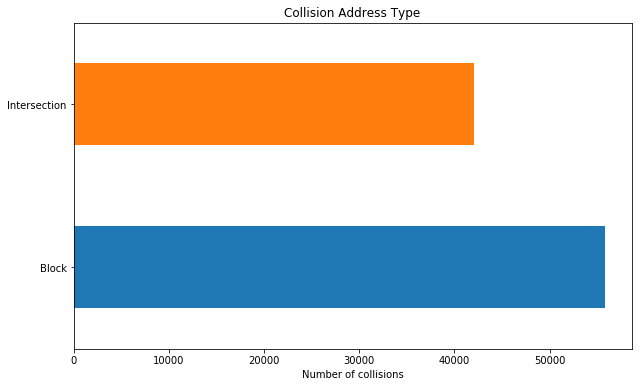

In [26]:
df_balanced['ADDRTYPE'].value_counts().plot(kind='barh', figsize=(10,6))

plt.xlabel('Number of collisions')
plt.title('Collision Address Type')
plt.show()

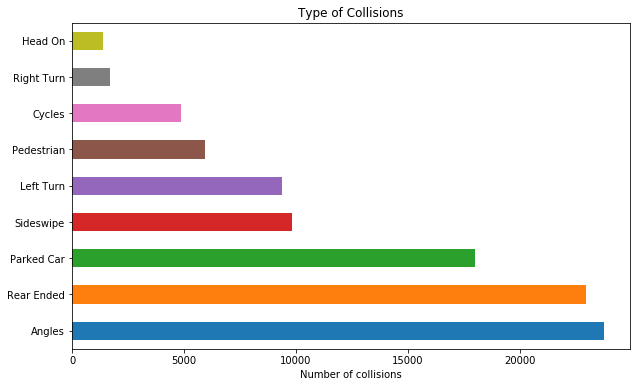

In [27]:
df_balanced['COLLISIONTYPE'].value_counts().plot(kind='barh', figsize=(10,6))

plt.xlabel('Number of collisions')
plt.title('Type of Collisions')
plt.show()

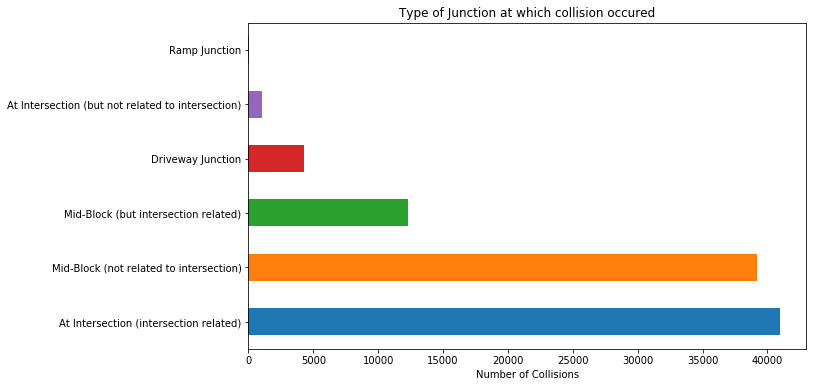

In [28]:
df_balanced['JUNCTIONTYPE'].value_counts().plot(kind='barh', figsize=(10,6))

plt.xlabel('Number of Collisions')
plt.title('Type of Junction at which collision occured')
plt.show()

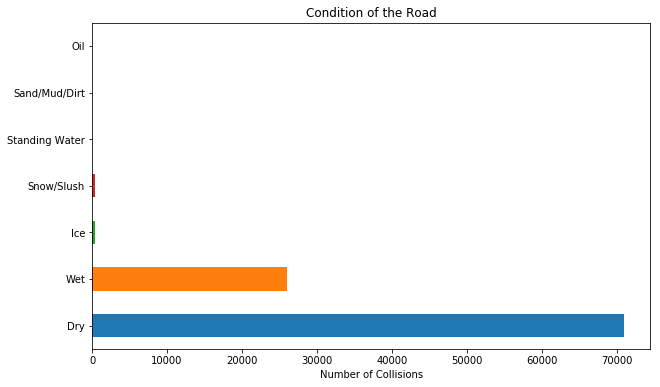

In [29]:
df_balanced['ROADCOND'].value_counts().plot(kind='barh', figsize=(10,6))

plt.xlabel('Number of Collisions')
plt.title('Condition of the Road')
plt.show()

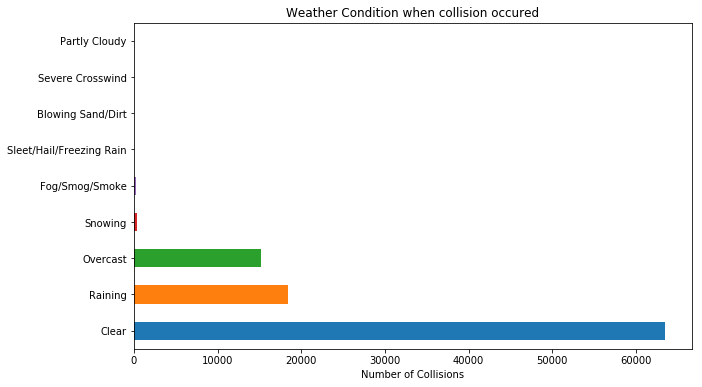

In [30]:
df_balanced['WEATHER'].value_counts().plot(kind='barh', figsize=(10,6))

plt.xlabel('Number of Collisions')
plt.title('Weather Condition when collision occured')
plt.show()

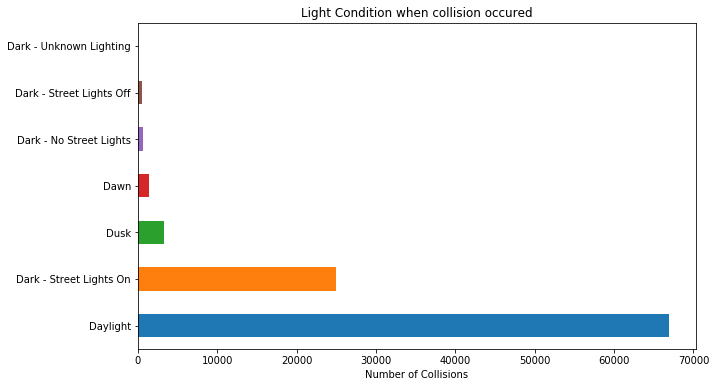

In [31]:
df_balanced['LIGHTCOND'].value_counts().plot(kind='barh', figsize=(10,6))

plt.xlabel('Number of Collisions')
plt.title('Light Condition when collision occured')
plt.show()

#### Encoding Categorical Columns and splitting dataset into training and test dataset

In [32]:
X = df_balanced.iloc[:,1:]

#Encoding Categorical Features
X = pd.get_dummies(data=X, columns=['ADDRTYPE','COLLISIONTYPE','JUNCTIONTYPE','WEATHER',
                                                            'ROADCOND','LIGHTCOND','UNDERINFL','HITPARKEDCAR'])


In [33]:
y = df_balanced['SEVERITYCODE'].values
y[0:5]

array([1, 1, 1, 1, 1], dtype=int64)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (78281, 50) (78281,)
Test set: (19571, 50) (19571,)


In [38]:
type(y_train)

numpy.ndarray

#### Plotting Correlation Heatmap

In [39]:
df_ytrain = pd.DataFrame(y_train)

In [41]:
df_corr = pd.concat([df_ytrain,X_train])
df_corr = df_corr.corr()

C:\Users\Bharath\Anaconda3\lib\site-packages\pandas\core\indexes\range.py:465: RuntimeWarning: '<' not supported between instances of 'int' and 'str', sort order is undefined for incomparable objects
  return self._int64index.union(other)


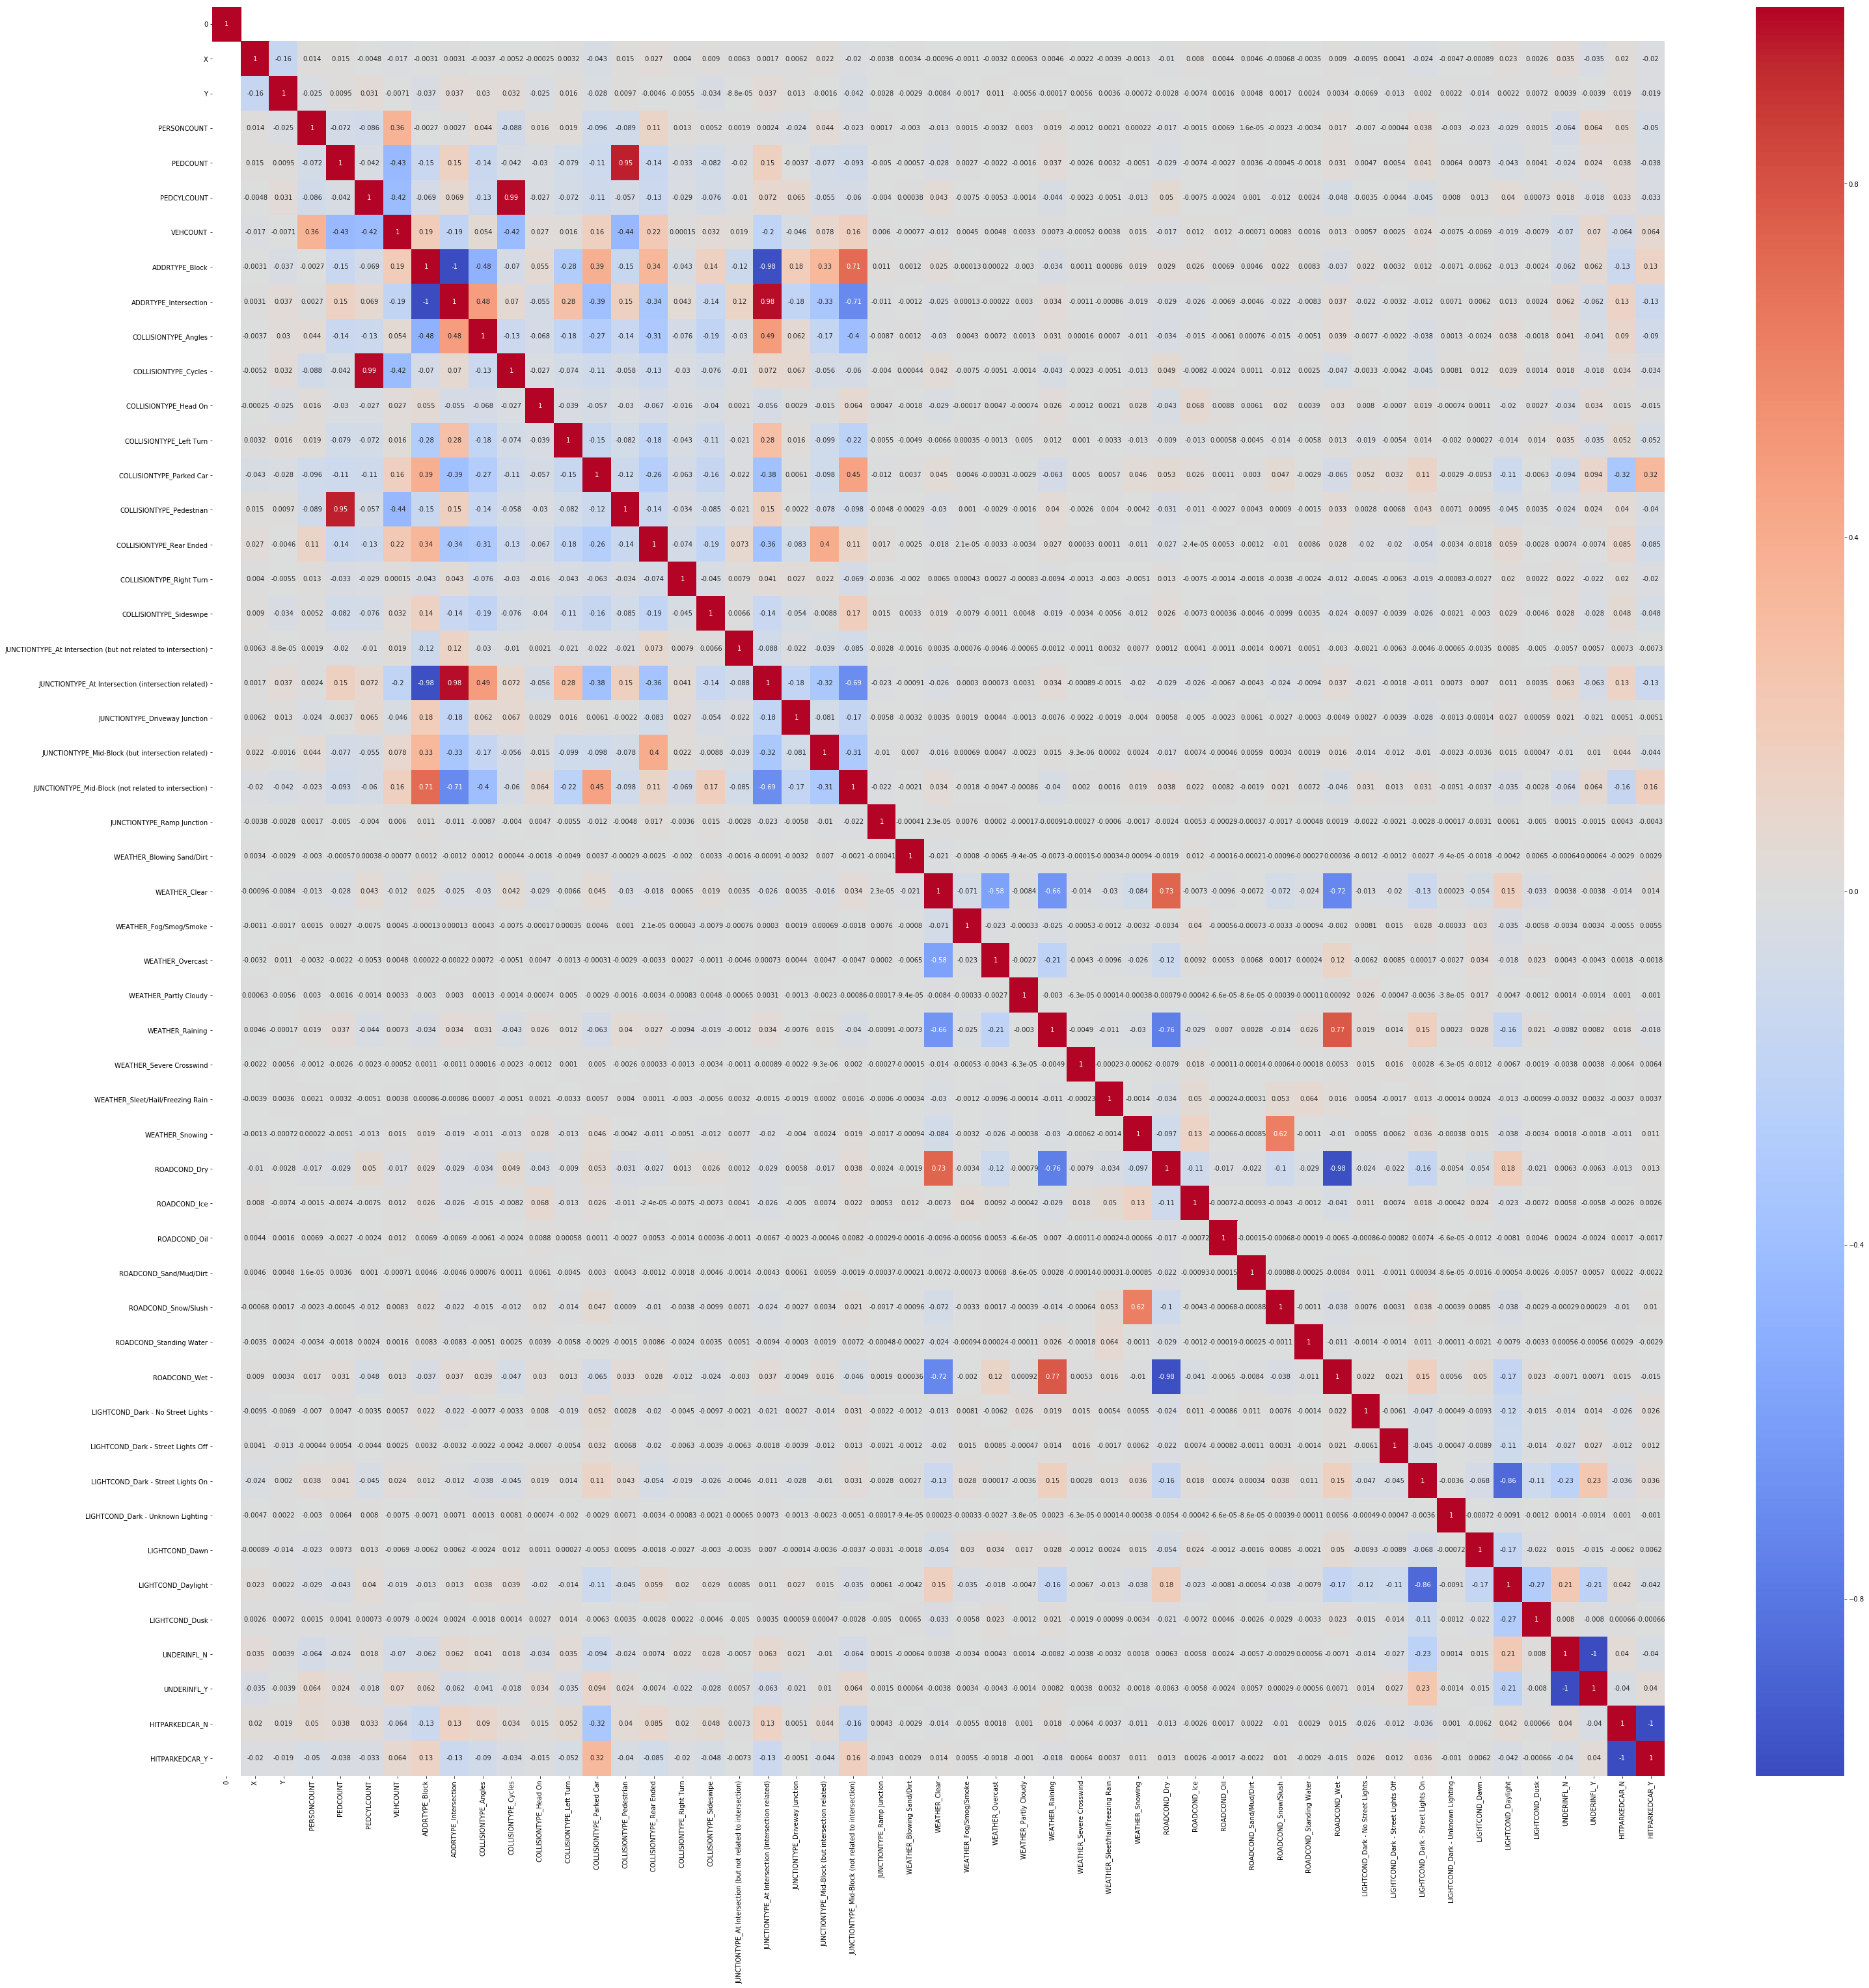

In [76]:
plt.figure(figsize=(50,50))
sns.heatmap(df_corr,annot=True,cmap='coolwarm')
plt.savefig('corr.png')
#seaborn.pairplot(df_normalized)

In [43]:
std_scale = StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)

C:\Users\Bharath\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  
C:\Users\Bharath\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  This is separate from the ipykernel package so we can avoid doing imports until


### Applying classification Machine Learning Algorithms

#### 1. K Nearest Neighbor(KNN)

Finding the best k to build the model with the best accuracy.

In [44]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.63900669, 0.63359052, 0.66174442, 0.65581728, 0.67027745,
       0.66312401, 0.67543815, 0.66700731, 0.67513157])

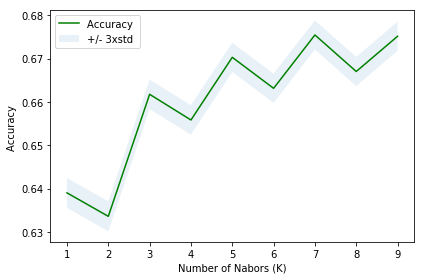

In [45]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Nabors (K)')
plt.tight_layout()
plt.show()

In [46]:
print( "The best accuracy is", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy is 0.6754381482806193 with k= 7


In [47]:
k=7
neigh = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=7, p=2,
           weights='uniform')

In [48]:
yhat = neigh.predict(X_test)
yhat

array([1, 1, 1, ..., 1, 2, 2], dtype=int64)

In [49]:
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.755777263959326
Test set Accuracy:  0.6754381482806193


In [50]:
knn_acc = jaccard_similarity_score(y_test, yhat)
knn_acc

0.6754381482806193

In [51]:
f1_score(y_test, yhat, average='weighted')

0.6754352468100059

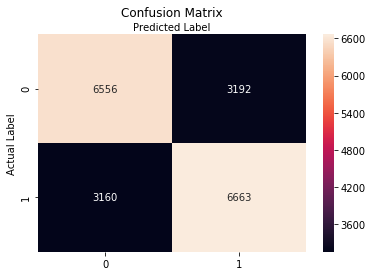

In [77]:
cm = confusion_matrix(y_test, yhat)
fig, ax = plt.subplots()
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix", y=1.1)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
ax.xaxis.set_label_position("top")
plt.show()

#### 2. Decision Tree

In [52]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(criterion="entropy", max_depth=7)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [53]:
predtree = tree.predict(X_test)

In [54]:
print(predtree[0:5])
print(y_test[0:5])

[2 2 1 1 2]
[2 1 1 1 2]


In [55]:
print('Decision Tree\'s Accuracy: ', metrics.accuracy_score(y_test, predtree))

Decision Tree's Accuracy:  0.6936283276276123


In [56]:
Dt_acc = jaccard_similarity_score(y_test, predtree)
Dt_acc

0.6936283276276123

In [57]:
f1_score(y_test,predtree, average='weighted')

0.6819985219828926

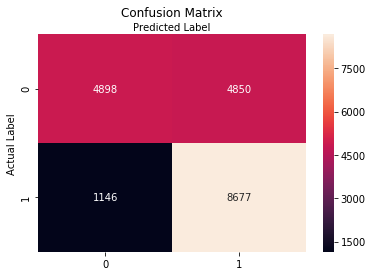

In [78]:
cm = confusion_matrix(y_test, predtree)
fig, ax = plt.subplots()
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix", y=1.1)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
ax.xaxis.set_label_position("top")
plt.show()

#### 3. Support Vector Machine

In [58]:
from sklearn import svm

clf_svm = svm.SVC(kernel='rbf')
clf_svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [59]:
svm_yhat = clf_svm.predict(X_test)
svm_yhat[0:5]

array([1, 2, 1, 1, 2], dtype=int64)

In [60]:
f1_score(y_test, svm_yhat, average='weighted')

0.6923053757109702

In [61]:
svm_acc = jaccard_similarity_score(y_test, svm_yhat)
svm_acc

0.7000664248122221

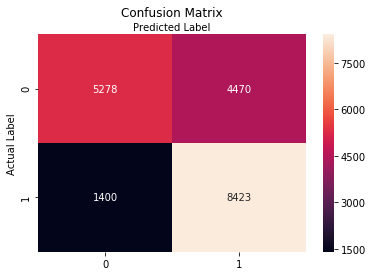

In [79]:
cm = confusion_matrix(y_test, svm_yhat)
fig, ax = plt.subplots()
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix", y=1.1)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
ax.xaxis.set_label_position("top")
plt.show()

#### 4. Logistic Regression

In [62]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(C=0.01, solver='liblinear')
LR.fit(X_train, y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:
LR_yhat = LR.predict(X_test)
LR_yhat

array([1, 2, 1, ..., 1, 2, 2], dtype=int64)

In [64]:
lr_acc = jaccard_similarity_score(y_test, LR_yhat)
lr_acc

0.6960298400694905

In [65]:
log_loss(y_test, LR_yhat)

17.203606702434158

In [66]:
f1_score(y_test, LR_yhat, average='weighted')

0.6891715877694646

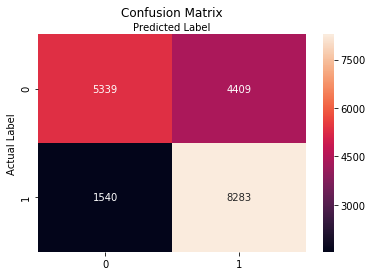

In [80]:
cm = confusion_matrix(y_test, LR_yhat)
fig, ax = plt.subplots()
sns.heatmap(cm,annot=True,fmt="d")
plt.title("Confusion Matrix", y=1.1)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
ax.xaxis.set_label_position("top")
plt.show()

## Plotting Results

In [67]:
acc_dict = {'knn':knn_acc, 'Descision_tree':Dt_acc, 'svm':svm_acc, 'LR':lr_acc}

In [68]:
acc_dict

{'knn': 0.6754381482806193,
 'Descision_tree': 0.6936283276276123,
 'svm': 0.7000664248122221,
 'LR': 0.6960298400694905}

In [69]:
acc_dict.items()

dict_items([('knn', 0.6754381482806193), ('Descision_tree', 0.6936283276276123), ('svm', 0.7000664248122221), ('LR', 0.6960298400694905)])

In [70]:
acc_dict = sorted(acc_dict.items(), key=lambda x: x[1], reverse=True)
acc_dict

[('svm', 0.7000664248122221),
 ('LR', 0.6960298400694905),
 ('Descision_tree', 0.6936283276276123),
 ('knn', 0.6754381482806193)]

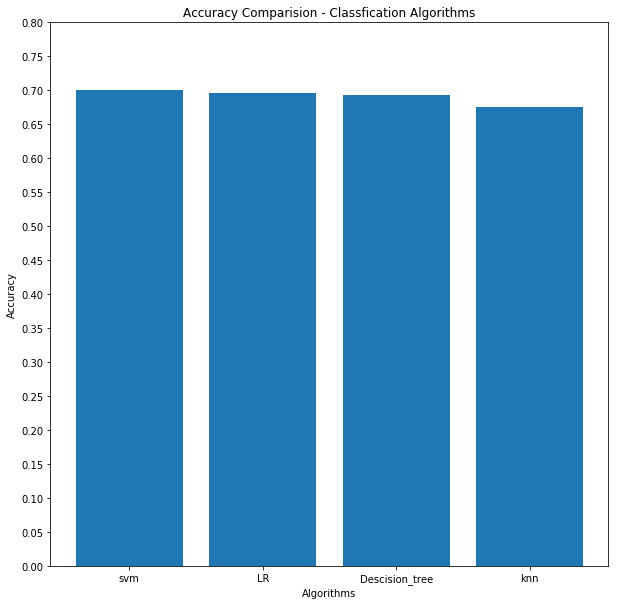

In [71]:
dict1 = {}

for ele in acc_dict:
    dict1[ele[0]]=ele[1]
    
algorithms = dict1.keys()
accuracy = dict1.values()
plt.figure(figsize=(10,10))
plt.bar(algorithms, accuracy)
plt.xlabel('Algorithms')
plt.yticks(np.arange(0,max(accuracy)+0.1,0.05))
plt.ylabel('Accuracy')
plt.title('Accuracy Comparision - Classfication Algorithms')
plt.show()

Clearly, Kernel Support Vector Machine is the best classifier for this classification problem based on accuracy, followed by the Logistic Regression model.